In [31]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import plotly
# connected=True means it will download the latest version of plotly javascript library.
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['googleplaystore_user_reviews.csv', 'googleplaystore.csv', 'license.txt']


In [32]:
df = pd.read_csv("../input/googleplaystore.csv")

In [33]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [35]:
# Maximum rating 
df[['Rating']].max()

Rating    19.0
dtype: float64

In [36]:
# Number of apps in the play store
df[['App']].nunique()

App    9660
dtype: int64

### Data Cleaning

In [37]:
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [38]:
df = df[df['Installs'] != 'Free']
df = df[df['Installs'] != 'Paid']

In [39]:
#Replace '+' ',' with ' ' in column 'Installs'
df['Installs'] = df['Installs'].apply(lambda x: x.replace('+', '') if '+' in str(x) else x)
df['Installs'] = df['Installs'].apply(lambda x: x.replace(',', '') if ',' in str(x) else x)
df['Installs'] = df['Installs'].apply(lambda x: int(x))
print(type(df['Installs'].values))

<class 'numpy.ndarray'>


In [40]:
# Replace M and Replace k by dividing with 1000 in 'Size'
df['Size'] = df['Size'].apply(lambda x: str(x).replace('Varies with device', 'NaN') if 'Varies with device' in str(x) else x)

df['Size'] = df['Size'].apply(lambda x: str(x).replace('M', '') if 'M' in str(x) else x)
df['Size'] = df['Size'].apply(lambda x: str(x).replace(',', '') if 'M' in str(x) else x)
df['Size'] = df['Size'].apply(lambda x: float(str(x).replace('k', '')) / 1000 if 'k' in str(x) else x)


df['Size'] = df['Size'].apply(lambda x: float(x))
df['Installs'] = df['Installs'].apply(lambda x: float(x))

df['Price'] = df['Price'].apply(lambda x: str(x).replace('$', '') if '$' in str(x) else str(x))
df['Price'] = df['Price'].apply(lambda x: float(x))

df['Reviews'] = df['Reviews'].apply(lambda x: int(x))

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
App               10840 non-null object
Category          10840 non-null object
Rating            9366 non-null float64
Reviews           10840 non-null int64
Size              9145 non-null float64
Installs          10840 non-null float64
Type              10839 non-null object
Price             10840 non-null float64
Content Rating    10840 non-null object
Genres            10840 non-null object
Last Updated      10840 non-null object
Current Ver       10832 non-null object
Android Ver       10838 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 1.2+ MB


/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.

/opt/conda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning:

invalid value encountered in true_divide

/opt/conda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning:

invalid value encountered in double_scalars



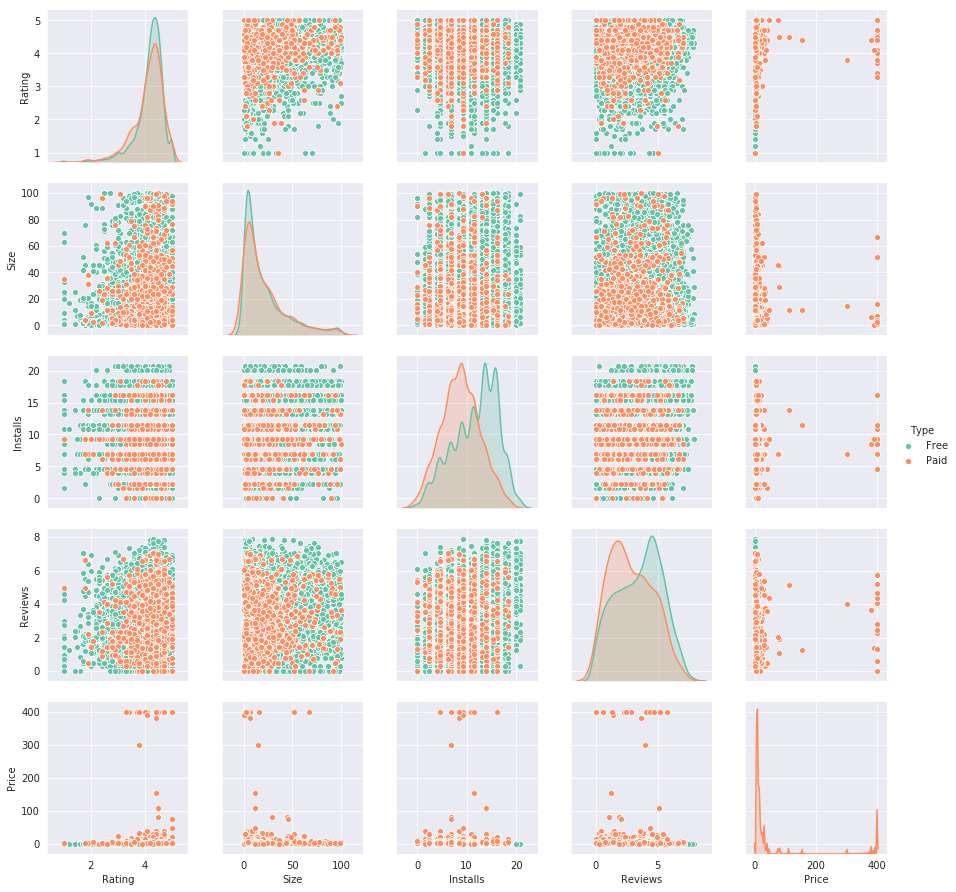

In [42]:
x = df['Rating'].dropna()
y = df['Size'].dropna()
z = df['Installs'][df.Installs!= 0].dropna()
p = df['Reviews'][df.Reviews!= 0].dropna()
t = df['Type'].dropna()

price = df['Price']

p = sns.pairplot(pd.DataFrame(list(zip(x, y, np.log(z), np.log10(p), t, price)), 
                        columns=['Rating','Size', 'Installs', 'Reviews', 'Type', 'Price']), hue='Type', palette="Set2")


In [43]:
Number_of_apps_in_category = df['Category'].value_counts().sort_values(ascending = True)

In [44]:
data = [go.Pie(labels = Number_of_apps_in_category.index,
              values = Number_of_apps_in_category.values,
              hoverinfo = 'label+value')]

plotly.offline.iplot(data,filename = 'activity_category')

* Family and Game apps have the highest market prevelance.
* Interestingly, Tools, Business and Medical apps are also catching up.

### Average rating of app

In [45]:
df['Rating'].mean()

4.191757420456978

In [46]:
data = [go.Histogram(x = df.Rating,
        xbins = {'start': 1, 'size': 0.1, 'end' :5}
)]
plotly.offline.iplot(data, filename='overall_rating_distribution')

F_onewayResult(statistic=17.458034645387226, pvalue=7.792539500402071e-29)

The p-value is extremely small, hence we reject the null hypothesis in favor of the alternate hypothesis.



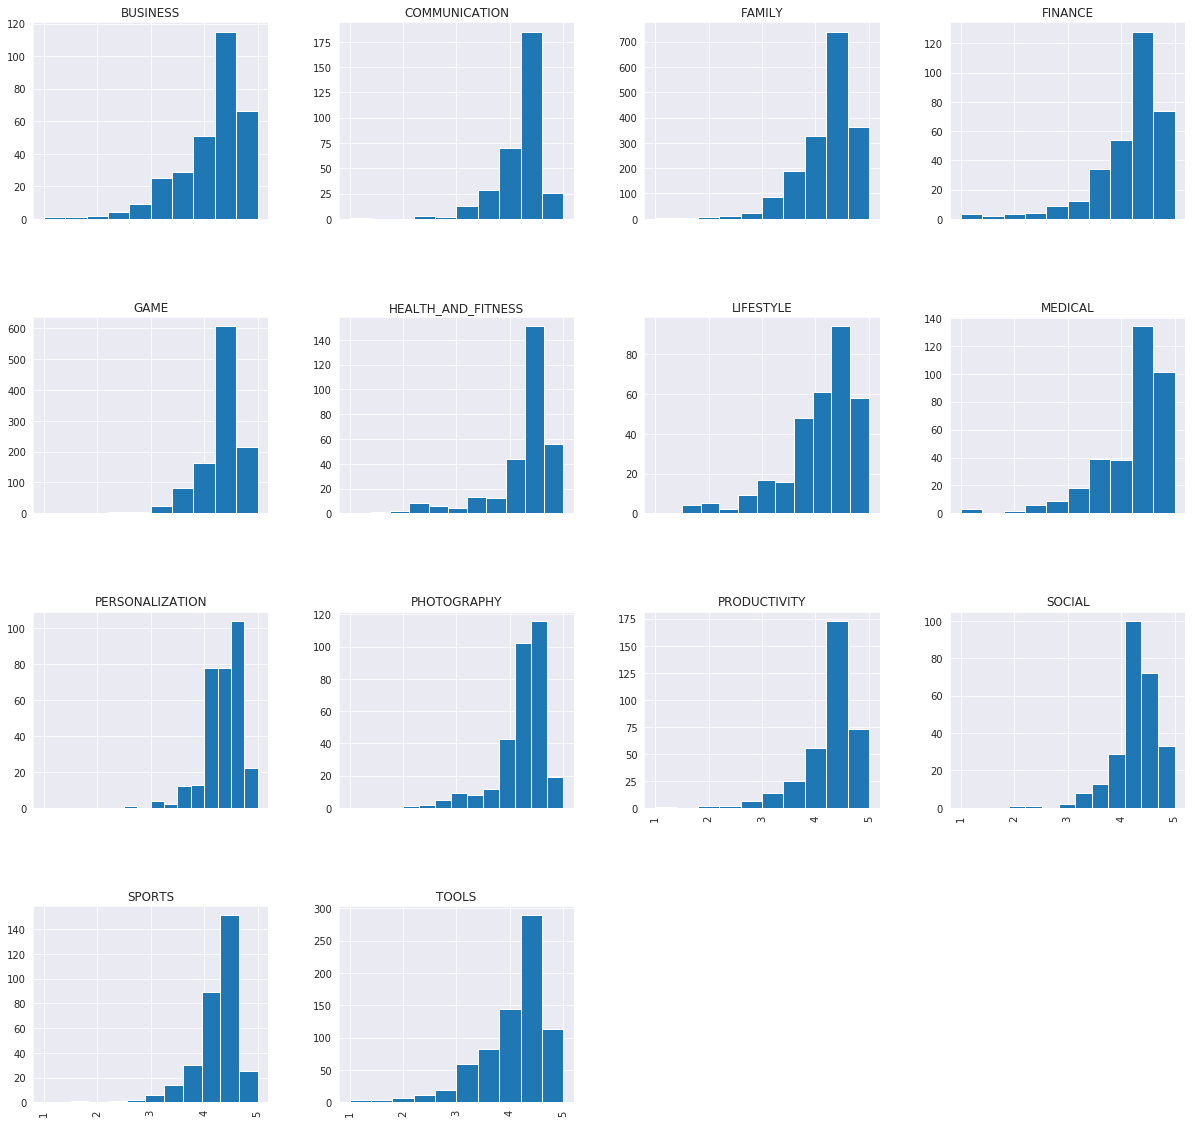

In [47]:
import scipy.stats as stats
f = stats.f_oneway(df.loc[df.Category == 'BUSINESS']['Rating'].dropna(), 
               df.loc[df.Category == 'FAMILY']['Rating'].dropna(),
               df.loc[df.Category == 'GAME']['Rating'].dropna(),
               df.loc[df.Category == 'PERSONALIZATION']['Rating'].dropna(),
               df.loc[df.Category == 'LIFESTYLE']['Rating'].dropna(),
               df.loc[df.Category == 'FINANCE']['Rating'].dropna(),
               df.loc[df.Category == 'EDUCATION']['Rating'].dropna(),
               df.loc[df.Category == 'MEDICAL']['Rating'].dropna(),
               df.loc[df.Category == 'TOOLS']['Rating'].dropna(),
               df.loc[df.Category == 'PRODUCTIVITY']['Rating'].dropna()
              )

print(f)
print('\nThe p-value is extremely small, hence we reject the null hypothesis in favor of the alternate hypothesis.\n')
#temp = df.loc[df.Category.isin(['BUSINESS', 'DATING'])]

groups = df.groupby('Category').filter(lambda x: len(x) > 286).reset_index()
array = groups['Rating'].hist(by=groups['Category'], sharex=True, figsize=(20,20))

The average app rating across each category is significantly different

### Best performing categories

In [48]:
groups = df.groupby('Category').filter(lambda x: len(x) >= 170).reset_index()
#print(type(groups.item.['BUSINESS']))
print('Average rating = ', np.nanmean(list(groups.Rating)))
#print(len(groups.loc[df.Category == 'DATING']))
c = ['hsl('+str(h)+',50%'+',50%)' for h in np.linspace(0, 720, len(set(groups.Category)))]


#df_sorted = df.groupby('Category').agg({'Rating':'median'}).reset_index().sort_values(by='Rating', ascending=False)
#print(df_sorted)

layout = {'title' : 'App ratings across major categories',
        'xaxis': {'tickangle':-40},
        'yaxis': {'title': 'Rating'},
          'plot_bgcolor': 'rgb(250,250,250)',
          'shapes': [{
              'type' :'line',
              'x0': -.5,
              'y0': np.nanmean(list(groups.Rating)),
              'x1': 19,
              'y1': np.nanmean(list(groups.Rating)),
              'line': { 'dash': 'dashdot'}
          }]
          }

data = [{
    'y': df.loc[df.Category==category]['Rating'], 
    'type':'violin',
    'name' : category,
    'showlegend':False
    } for i,category in enumerate(list(set(groups.Category)))]



plotly.offline.iplot({'data': data, 'layout': layout})

Average rating =  4.187854642037909


* Almost all app categories perform decently. Health and Fitness and Books and Reference produce the highest quality apps with 50% apps having a rating greater than 4.5. This is extremely high!
* On the contrary, 50% of apps in the Dating category have a rating lesser than the average rating.
* A few junk apps also exist in the Lifestyle, Family and Finance category.

### How do app sizes impact the app rating?

In [49]:
groups = df.groupby('Category').filter(lambda x: len(x) >=50).reset_index()

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



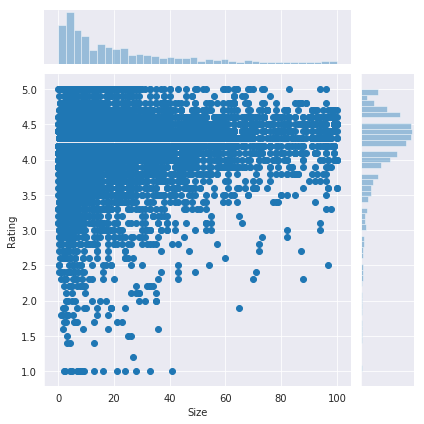

In [50]:
sns.set_style("darkgrid")
ax = sns.jointplot(df['Size'], df['Rating'])

Most top rated apps are optimally sized between ~2MB to ~40MB


In [51]:
c = ['hsl('+str(h)+',50%'+',50%)' for h in np.linspace(0, 360, len(list(set(groups.Category))))]

subset_df = df[df.Size > 40]
groups_temp = subset_df.groupby('Category').filter(lambda x: len(x) >20)


data = [{
    'x': groups_temp.loc[subset_df.Category==category[1]]['Rating'], 
    'type':'scatter',
    'y' : subset_df['Size'],
    'name' : str(category[1]),
    'mode' : 'markers',
    'showlegend': True,
    } for category in enumerate(['GAME', 'FAMILY'])]


layout = {'title':"Rating vs Size", 
          'xaxis': {'title' : 'Rating'},
          'yaxis' : {'title' : 'Size (in MB)'},
         'plot_bgcolor': 'rgb(0,0,0)'}

plotly.offline.iplot({'data': data, 'layout': layout})

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



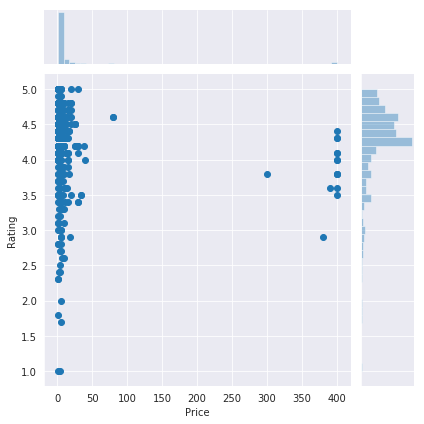

In [52]:
paid_apps = df[df['Price'] > 0]
sns.jointplot('Price','Rating',paid_apps)

Most top rated apps are optimally priced between ~1\$ to ~30\$. There are only a very few apps priced above 20\$.

### Current pricing trend

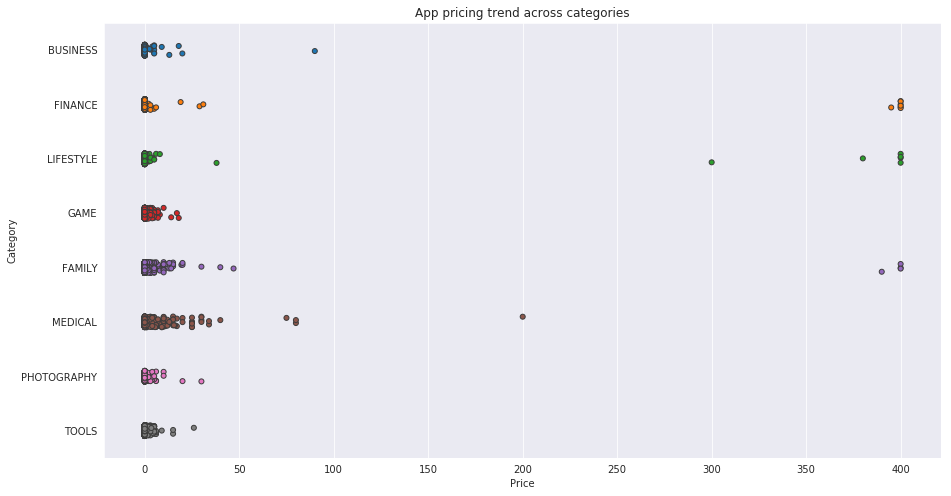

In [53]:
df1 = df[df.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY', 'MEDICAL', 'TOOLS', 'FINANCE','LIFESTYLE','BUSINESS'])]

sns.set_style('darkgrid')
fig,ax = plt.subplots()
fig.set_size_inches(15, 8)
p = sns.stripplot(x = "Price", y = "Category", data = df1, jitter = True, linewidth = 1)
title = ax.set_title('App pricing trend across categories')

Few apps are priced above $200. Let us examine these apps

In [54]:
df[['Category', 'App']][df['Price'] > 200]

,Category,App
4197,FAMILY,most expensive app (H)
4362,LIFESTYLE,💎 I'm rich
4367,LIFESTYLE,I'm Rich - Trump Edition
5351,LIFESTYLE,I am rich
5354,FAMILY,I am Rich Plus
5355,LIFESTYLE,I am rich VIP
5356,FINANCE,I Am Rich Premium
5357,LIFESTYLE,I am extremely Rich
5358,FINANCE,I am Rich!
5359,FINANCE,I am rich(premium)


In [55]:
df_price = df1[df1['Price'] < 100]
df_price

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
187,Visual Voicemail by MetroPCS,BUSINESS,4.1,16129,NaN,10000000.0,Free,0.00,Everyone,Business,"July 30, 2018",Varies with device,Varies with device
188,Indeed Job Search,BUSINESS,4.3,674730,NaN,50000000.0,Free,0.00,Everyone,Business,"May 21, 2018",Varies with device,Varies with device
189,Uber Driver,BUSINESS,4.4,1254730,NaN,10000000.0,Free,0.00,Everyone,Business,"August 3, 2018",Varies with device,Varies with device
190,ADP Mobile Solutions,BUSINESS,4.3,85185,29.000,5000000.0,Free,0.00,Everyone,Business,"July 17, 2018",3.4.2,5.0 and up
191,Snag - Jobs Hiring Now,BUSINESS,4.3,32584,NaN,1000000.0,Free,0.00,Everyone,Business,"May 4, 2018",Varies with device,Varies with device
192,Docs To Go™ Free Office Suite,BUSINESS,4.1,217730,NaN,50000000.0,Free,0.00,Everyone,Business,"April 2, 2018",Varies with device,Varies with device
193,Google My Business,BUSINESS,4.4,70991,NaN,5000000.0,Free,0.00,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
194,OfficeSuite : Free Office + PDF Editor,BUSINESS,4.3,1002861,35.000,100000000.0,Free,0.00,Everyone,Business,"August 2, 2018",9.7.14188,4.1 and up
195,USPS MOBILE®,BUSINESS,3.9,16589,9.100,1000000.0,Free,0.00,Everyone,Business,"June 14, 2018",4.9.10,4.0.3 and up
196,Job Search by ZipRecruiter,BUSINESS,4.8,148945,25.000,1000000.0,Free,0.00,Everyone,Business,"July 19, 2018",5.2.8,5.0 and up


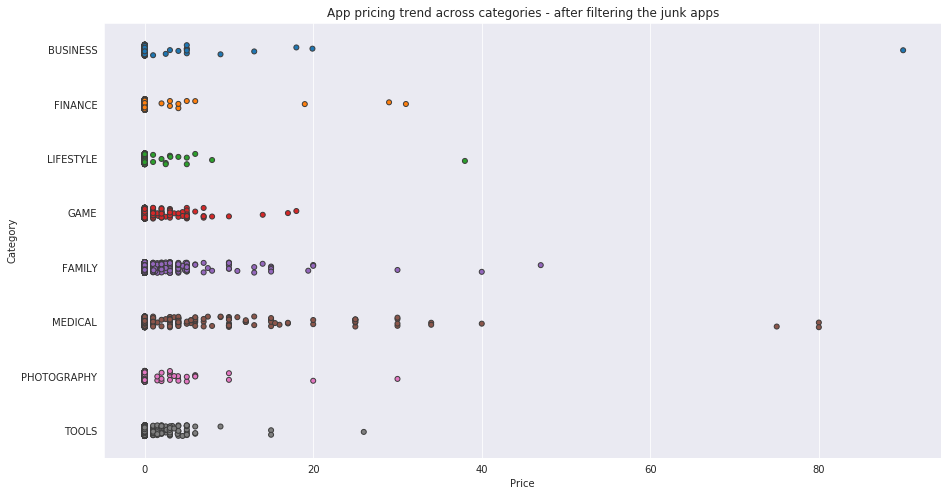

In [56]:
fig, ax = plt.subplots()
sns.set_style('darkgrid')
fig.set_size_inches(15,8)
df_price = df1[df1['Price'] < 100]
sns.stripplot(x = 'Price', y = 'Category', data = df_price, jitter = True, linewidth = 1)
title = ax.set_title('App pricing trend across categories - after filtering the junk apps')

* Clearly, Medical and Family apps are the most expensive. Some medical apps extend even upto 80\$.
* All other apps are priced under 30\$.
* All game apps are reasonably priced below 20\$.